In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [2]:
%%time
# read the csv file
reddit_data = pd.read_csv('/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/merged_reddit_reviews.csv')
print(reddit_data.info())
print(f'The first 5 rows of the dataset are: \n{reddit_data.head()}')
reddit_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232264 entries, 0 to 3232263
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Title            object 
 1   URL              object 
 2   Post Text        object 
 3   Upvotes          float64
 4   Comment Author   object 
 5   Comment          object 
 6   Comment Upvotes  float64
 7   Submission Date  object 
 8   Comment Date     object 
 9   Service Name     object 
dtypes: float64(2), object(8)
memory usage: 246.6+ MB
None
The first 5 rows of the dataset are: 
                                               Title  \
0  Australian vineyards take biosecurity very ser...   
1  Australian vineyards take biosecurity very ser...   
2  Australian vineyards take biosecurity very ser...   
3  Australian vineyards take biosecurity very ser...   
4  Australian vineyards take biosecurity very ser...   

                                   URL Post Text  Upvotes  \
0  https://i.redd.it/wlor6odk3p1

,Title,URL,Post Text,Upvotes,Comment Author,Comment,Comment Upvotes,Submission Date,Comment Date,Service Name
0,Australian vineyards take biosecurity very ser...,https://i.redd.it/wlor6odk3p1c1.jpg,NaN,6517.0,AutoModerator,--- \n\n>This is a friendly reminder to [...,1.0,2023-11-21 23:32:32,2023-11-21 23:32:33,Australian Biosecurity Measures
1,Australian vineyards take biosecurity very ser...,https://i.redd.it/wlor6odk3p1c1.jpg,NaN,6517.0,cl0thsteel,The Chinese words: Before you receive permissi...,359.0,2023-11-21 23:32:32,2023-11-21 23:50:45,Australian Biosecurity Measures
2,Australian vineyards take biosecurity very ser...,https://i.redd.it/wlor6odk3p1c1.jpg,NaN,6517.0,Ok-Veterinarian-1222,“Do it for the Vines”,162.0,2023-11-21 23:32:32,2023-11-22 00:01:31,Australian Biosecurity Measures
3,Australian vineyards take biosecurity very ser...,https://i.redd.it/wlor6odk3p1c1.jpg,NaN,6517.0,Gosha_Swift,I heard through the grapevine “Humans really a...,54.0,2023-11-21 23:32:32,2023-11-22 00:32:59,Australian Biosecurity Measures
4,Australian vineyards take biosecurity very ser...,https://i.redd.it/wlor6odk3p1c1.jpg,NaN,6517.0,m00nh34d,I can only imagine how many people end up vomm...,50.0,2023-11-21 23:32:32,2023-11-22 00:12:30,Australian Biosecurity Measures


In [3]:

# Convert Date Columns to Datetime
reddit_data['Submission Date'] = pd.to_datetime(reddit_data['Submission Date'])
reddit_data['Comment Date'] = pd.to_datetime(reddit_data['Comment Date'])

# Extract Year and Quarter
reddit_data['Year'] = reddit_data['Comment Date'].dt.year
reddit_data['Quarter'] = reddit_data['Comment Date'].dt.to_period('Q').astype(str)

reddit_data.head()

,Title,URL,Post Text,Upvotes,Comment Author,Comment,Comment Upvotes,Submission Date,Comment Date,Service Name,Year,Quarter
0,Australian vineyards take biosecurity very ser...,https://i.redd.it/wlor6odk3p1c1.jpg,NaN,6517.0,AutoModerator,--- \n\n>This is a friendly reminder to [...,1.0,2023-11-21 23:32:32,2023-11-21 23:32:33,Australian Biosecurity Measures,2023.0,2023Q4
1,Australian vineyards take biosecurity very ser...,https://i.redd.it/wlor6odk3p1c1.jpg,NaN,6517.0,cl0thsteel,The Chinese words: Before you receive permissi...,359.0,2023-11-21 23:32:32,2023-11-21 23:50:45,Australian Biosecurity Measures,2023.0,2023Q4
2,Australian vineyards take biosecurity very ser...,https://i.redd.it/wlor6odk3p1c1.jpg,NaN,6517.0,Ok-Veterinarian-1222,“Do it for the Vines”,162.0,2023-11-21 23:32:32,2023-11-22 00:01:31,Australian Biosecurity Measures,2023.0,2023Q4
3,Australian vineyards take biosecurity very ser...,https://i.redd.it/wlor6odk3p1c1.jpg,NaN,6517.0,Gosha_Swift,I heard through the grapevine “Humans really a...,54.0,2023-11-21 23:32:32,2023-11-22 00:32:59,Australian Biosecurity Measures,2023.0,2023Q4
4,Australian vineyards take biosecurity very ser...,https://i.redd.it/wlor6odk3p1c1.jpg,NaN,6517.0,m00nh34d,I can only imagine how many people end up vomm...,50.0,2023-11-21 23:32:32,2023-11-22 00:12:30,Australian Biosecurity Measures,2023.0,2023Q4


In [4]:
# Get the minimum and maximum years
min_year = reddit_data['Year'].min()
max_year = reddit_data['Year'].max()
print(f"Data ranges from {min_year} to {max_year}")

Data ranges from 2009.0 to 2024.0


In [5]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232264 entries, 0 to 3232263
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Title            object        
 1   URL              object        
 2   Post Text        object        
 3   Upvotes          float64       
 4   Comment Author   object        
 5   Comment          object        
 6   Comment Upvotes  float64       
 7   Submission Date  datetime64[ns]
 8   Comment Date     datetime64[ns]
 9   Service Name     object        
 10  Year             float64       
 11  Quarter          object        
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 295.9+ MB


In [6]:
reddit_data.describe()

,Upvotes,Comment Upvotes,Year
count,3.232262e+06,3.232261e+06,3.232261e+06
mean,1.836950e+04,1.623481e+01,2.020770e+03
std,2.524029e+04,1.797602e+02,2.731701e+00
min,0.000000e+00,-1.063000e+03,2.009000e+03
25%,1.216000e+03,1.000000e+00,2.019000e+03
50%,6.070000e+03,2.000000e+00,2.021000e+03
75%,2.683600e+04,6.000000e+00,2.023000e+03
max,1.506420e+05,4.398100e+04,2.024000e+03


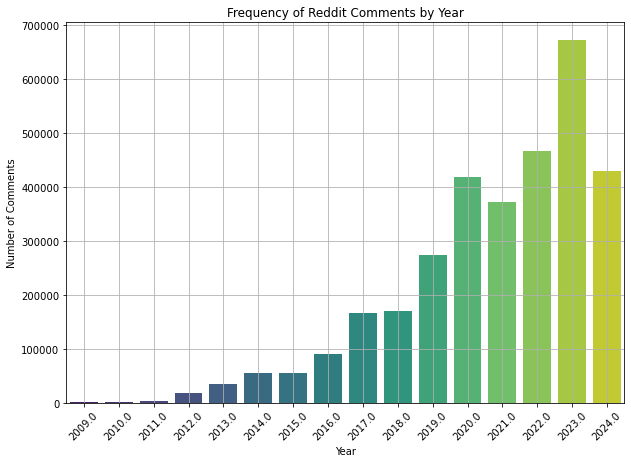

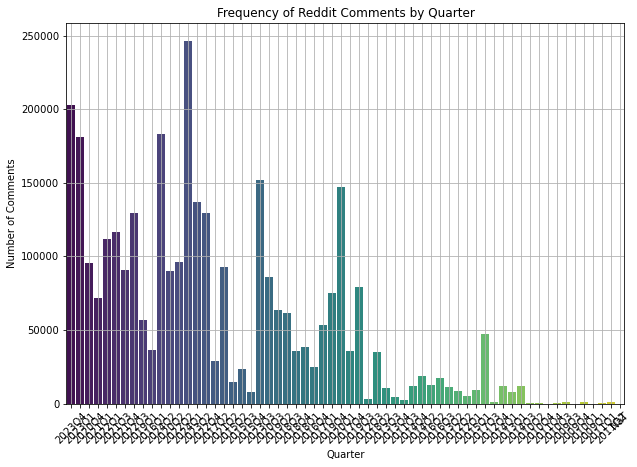

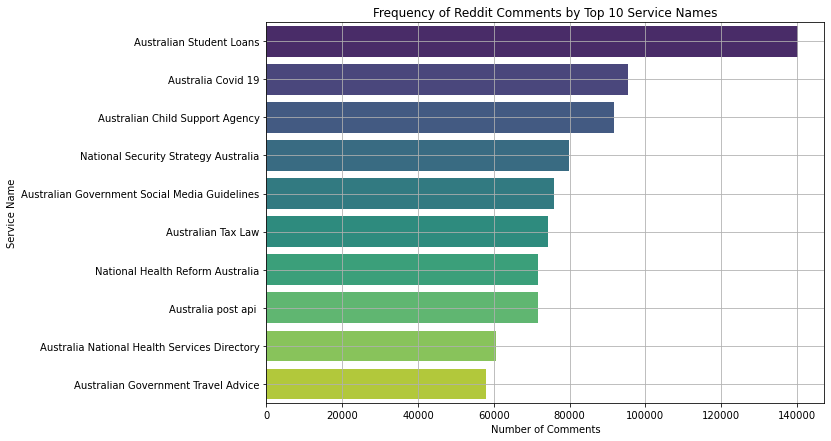

Frequency of Reddit Comments by Year:
2009.0      1365
2010.0      2325
2011.0      4149
2012.0     18693
2013.0     34470
2014.0     54756
2015.0     55423
2016.0     90791
2017.0    165825
2018.0    171208
2019.0    274559
2020.0    418350
2021.0    371779
2022.0    467265
2023.0    672075
2024.0    429228
Name: Year, dtype: int64

Frequency of Reddit Comments by Quarter:
2009Q1         1
2009Q3      1360
2009Q4         4
2010Q1       908
2010Q2       277
           ...  
2023Q3    151641
2023Q4    202538
2024Q1    246123
2024Q2    183105
NaT            3
Name: Quarter, Length: 62, dtype: int64

Frequency of Reddit Comments by Service Name:
Australian Student Loans                         140219
Australia Covid 19                                95387
Australian Child Support Agency                   91799
National Security Strategy Australia              79901
Australian Government Social Media Guidelines     75750
                                                  ...  
Australian Wa

In [16]:


# Ensure directories exist
image_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/assets/images/reddit'
os.makedirs(image_dir, exist_ok=True)

analysis_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/analysis/reddit'
os.makedirs(analysis_dir, exist_ok=True)

# Plot Frequency by Year
plt.figure(figsize=(10, 7))
sns.countplot(data=reddit_data, x='Year', palette='viridis')
plt.title('Frequency of Reddit Comments by Year')
plt.xlabel('Year')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_year.png'))
plt.show()

# Plot Frequency by Quarter
plt.figure(figsize=(10, 7))
sns.countplot(data=reddit_data, x='Quarter', palette='viridis')
plt.title('Frequency of Reddit Comments by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_quarter.png'))
plt.show()

# Plot Frequency by Top 10 Service Names
top_10_services = reddit_data['Service Name'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 7))
sns.countplot(data=reddit_data[reddit_data['Service Name'].isin(top_10_services)], y='Service Name', order=top_10_services, palette='viridis')
plt.title('Frequency of Reddit Comments by Top 10 Service Names')
plt.xlabel('Number of Comments')
plt.ylabel('Service Name')
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_service_name.png'))
plt.show()

# Frequency Tables
frequency_by_year = reddit_data['Year'].value_counts().sort_index()
frequency_by_quarter = reddit_data['Quarter'].value_counts().sort_index()
frequency_by_service_name = reddit_data['Service Name'].value_counts()

# Save Frequency Tables to CSV
frequency_by_year.to_csv(os.path.join(analysis_dir, 'frequency_by_year.csv'), header=['Frequency'])
frequency_by_quarter.to_csv(os.path.join(analysis_dir, 'frequency_by_quarter.csv'), header=['Frequency'])
frequency_by_service_name.to_csv(os.path.join(analysis_dir, 'frequency_by_service_name.csv'), header=['Frequency'])

# Display Frequency Tables
print("Frequency of Reddit Comments by Year:")
print(frequency_by_year)
print("\nFrequency of Reddit Comments by Quarter:")
print(frequency_by_quarter)
print("\nFrequency of Reddit Comments by Service Name:")
print(frequency_by_service_name)


Top 10 Posts with the Most Upvotes:
                                                     Title   Upvotes  \
3044982  Grass trees already blooming in the wake of th...  150642.0   
1004465  TIL in 2011, a 29-year-old Australian bartende...  118714.0   
2572143                       Benefits of Public Transport  114943.0   
96469    A photoshoot of car crash survivors for a New ...  111227.0   
528162   An Australian family set about rescuing as man...  111055.0   
1011505  This shot comes from photographer Sean Scott o...  105544.0   
1869154  Trump ousts Homeland Security cyber chief Chri...  104198.0   
215978                            My Covid-19 home project  101049.0   
3174779  The Australian embassy in Washington DC has re...   98715.0   
931664   The Taiwanese and Australian firefighters with...   93719.0   

                                Service Name  
3044982       Australian Wildfire Management  
1004465      Australian Fisheries Management  
2572143            Public Tran

/var/folders/bt/7ws71xxn45bffcbhj7ddvm080000gn/T/ipykernel_62328/1628361722.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


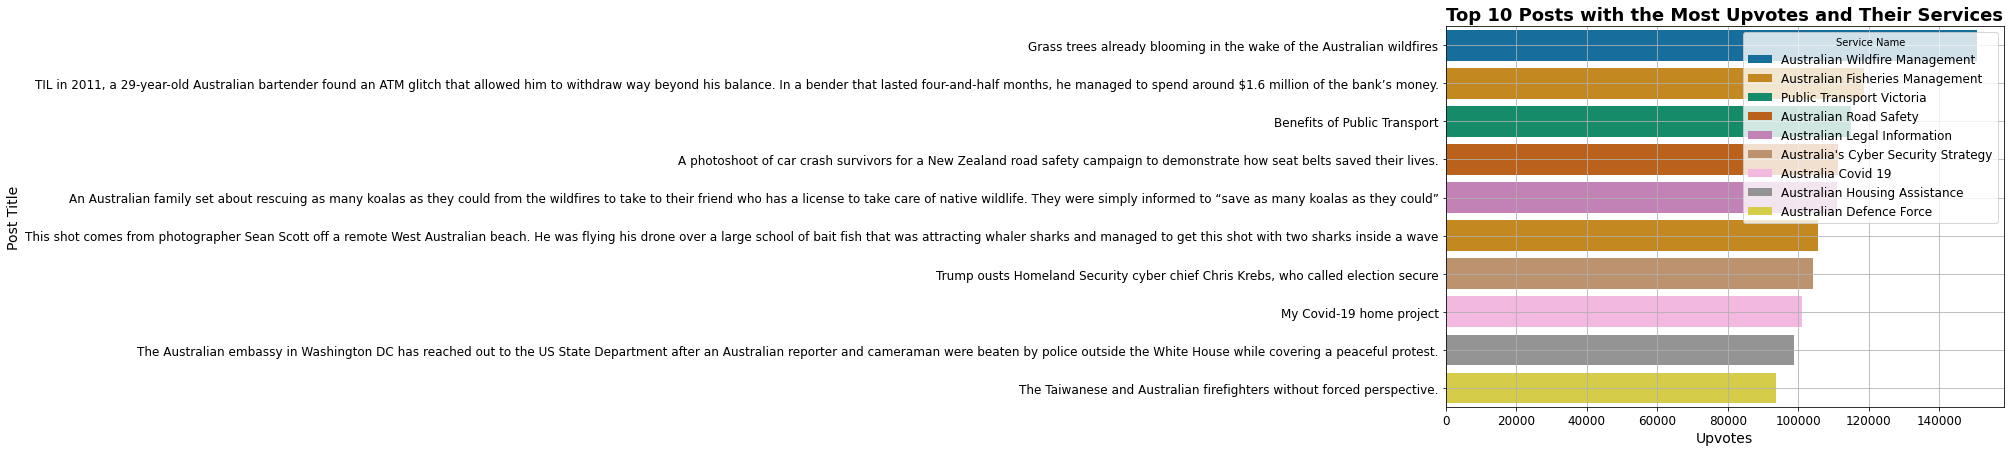

In [17]:

# Drop duplicate titles to ensure unique posts
unique_posts = reddit_data.drop_duplicates(subset=['Title'])

# Find the top 10 unique posts with the most upvotes
top_10_posts = unique_posts.nlargest(10, 'Upvotes')

# Print the titles and services of the top 10 posts
print("Top 10 Posts with the Most Upvotes:")
print(top_10_posts[['Title', 'Upvotes', 'Service Name']])

# Save the top 10 posts details to a CSV
top_10_posts.to_csv(os.path.join(analysis_dir, 'top_10_posts_by_upvotes.csv'), index=False)

# Plot the top 10 posts with the most upvotes
plt.figure(figsize=(10, 7))
sns.barplot(data=top_10_posts, x='Upvotes', y='Title', hue='Service Name', dodge=False, palette='colorblind')
plt.title('Top 10 Posts with the Most Upvotes and Their Services', fontsize=18, fontweight='bold')
plt.xlabel('Upvotes', fontsize=14)
plt.ylabel('Post Title', fontsize=14)
plt.legend(title='Service Name', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(image_dir, 'top_10_posts_by_upvotes.png'))
plt.show()


In [9]:


# # Extract Year, Quarter, Month, and Week
# reddit_data['Year'] = reddit_data['Comment Date'].dt.year
# reddit_data['Quarter'] = reddit_data['Comment Date'].dt.to_period('Q')
# reddit_data['Month'] = reddit_data['Comment Date'].dt.to_period('M')
# reddit_data['Week'] = reddit_data['Comment Date'].dt.to_period('W')

# # Perform Sentiment Analysis on Comments
# analyzer = SentimentIntensityAnalyzer()
# reddit_data['Sentiment'] = reddit_data['Comment'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# # Helper function to plot and save figures
# def plot_and_save(data, x_col, y_col, title, xlabel, ylabel, filename):
#     plt.figure(figsize=(10, 7))
#     sns.lineplot(data=data, x=x_col, y=y_col, marker='o')
#     plt.title(title, fontsize=20, fontweight='bold')
#     plt.xlabel(xlabel, fontsize=15)
#     plt.ylabel(ylabel, fontsize=15)
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.savefig(f"{image_output_dir}/{filename}.png")
#     plt.close()

# # Weekly Trends
# weekly_comment_volume = reddit_data.groupby('Week').size().reset_index(name='Comment Count')
# weekly_sentiment = reddit_data.groupby('Week')['Sentiment'].mean().reset_index()
# weekly_trends = weekly_comment_volume.merge(weekly_sentiment, on='Week')
# weekly_trends.to_csv(f"{analysis_dir}/weekly_trends.csv", index=False)
# plot_and_save(weekly_trends, 'Week', 'Comment Count', 'Weekly Comment Volume on Reddit', 'Week', 'Comment Count', 'weekly_comment_volume')
# plot_and_save(weekly_trends, 'Week', 'Sentiment', 'Weekly Sentiment on Reddit', 'Week', 'Average Sentiment', 'weekly_sentiment')

# # Monthly Trends
# monthly_comment_volume = reddit_data.groupby('Month').size().reset_index(name='Comment Count')
# monthly_sentiment = reddit_data.groupby('Month')['Sentiment'].mean().reset_index()
# monthly_trends = monthly_comment_volume.merge(monthly_sentiment, on='Month')
# monthly_trends.to_csv(f"{analysis_dir}/monthly_trends.csv", index=False)
# plot_and_save(monthly_trends, 'Month', 'Comment Count', 'Monthly Comment Volume on Reddit', 'Month', 'Comment Count', 'monthly_comment_volume')
# plot_and_save(monthly_trends, 'Month', 'Sentiment', 'Monthly Sentiment on Reddit', 'Month', 'Average Sentiment', 'monthly_sentiment')

# # Quarterly Trends
# quarterly_comment_volume = reddit_data.groupby('Quarter').size().reset_index(name='Comment Count')
# quarterly_sentiment = reddit_data.groupby('Quarter')['Sentiment'].mean().reset_index()
# quarterly_trends = quarterly_comment_volume.merge(quarterly_sentiment, on='Quarter')
# quarterly_trends.to_csv(f"{analysis_dir}/quarterly_trends.csv", index=False)
# plot_and_save(quarterly_trends, 'Quarter', 'Comment Count', 'Quarterly Comment Volume on Reddit', 'Quarter', 'Comment Count', 'quarterly_comment_volume')
# plot_and_save(quarterly_trends, 'Quarter', 'Sentiment', 'Quarterly Sentiment on Reddit', 'Quarter', 'Average Sentiment', 'quarterly_sentiment')

# # Correlation between events and trends
# # Note: This part requires a dataset of significant events and their dates. For illustration, let's create a dummy event dataset.
# events = pd.DataFrame({
#     'Event': ['Policy Change A', 'News Event B', 'Policy Change C'],
#     'Date': pd.to_datetime(['2020-01-15', '2021-06-20', '2022-11-10'])
# })

# # Merge events with weekly trends
# weekly_trends_with_events = pd.merge_asof(weekly_trends.sort_values('Week'), events.sort_values('Date'), left_on='Week', right_on='Date', direction='forward')
# weekly_trends_with_events.to_csv(f"{analysis_dir}/weekly_trends_with_events.csv", index=False)

# # Plot correlation
# plt.figure(figsize=(10, 7))
# sns.lineplot(data=weekly_trends_with_events, x='Week', y='Comment Count', marker='o', label='Comment Count')
# sns.lineplot(data=weekly_trends_with_events, x='Week', y='Sentiment', marker='o', label='Sentiment')
# for i, event in events.iterrows():
#     plt.axvline(event['Date'], color='r', linestyle='--', label=event['Event'])
# plt.title('Correlation Between Events and Weekly Trends on Reddit', fontsize=20, fontweight='bold')
# plt.xlabel('Week', fontsize=15)
# plt.ylabel('Value', fontsize=15)
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)
# plt.savefig(f"{image_output_dir}/correlation_events_weekly_trends.png")
# plt.close()


In [10]:
%%time


# Perform Sentiment Analysis on Comments
analyzer = SentimentIntensityAnalyzer()
reddit_data['Sentiment'] = reddit_data['Comment'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

CPU times: user 16min 22s, sys: 4.41 s, total: 16min 27s
Wall time: 16min 50s


<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

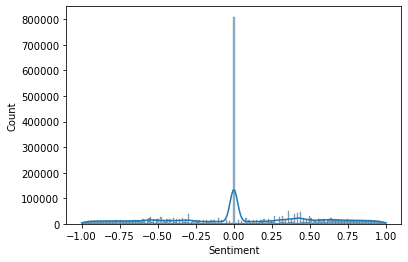

In [11]:
sns.histplot(reddit_data['Sentiment'], kde=True)
#

In [13]:
# Aggregate Sentiment by Quarter
quarterly_sentiment = reddit_data.groupby('Quarter')['Sentiment'].mean().reset_index()
quarterly_sentiment.head()

,Quarter,Sentiment
0,2009Q1,0.000000
1,2009Q3,0.096503
2,2009Q4,0.337800
3,2010Q1,0.123689
4,2010Q2,-0.047654


In [14]:

# Identify Significant Changes in Sentiment
# Calculate the difference in sentiment between consecutive quarters
quarterly_sentiment['Sentiment Change'] = quarterly_sentiment['Sentiment'].diff()
print(f"The first 5 rows of the dataset are: \n{quarterly_sentiment.head()}")

# Identify significant drops in sentiment
significant_drops = quarterly_sentiment[quarterly_sentiment['Sentiment Change'] < -0.1]


print(f"Significant Drops in Sentiment: \n{significant_drops}")


The first 5 rows of the dataset are: 
  Quarter  Sentiment  Sentiment Change
0  2009Q1   0.000000               NaN
1  2009Q3   0.096503          0.096503
2  2009Q4   0.337800          0.241297
3  2010Q1   0.123689         -0.214111
4  2010Q2  -0.047654         -0.171343
Significant Drops in Sentiment: 
  Quarter  Sentiment  Sentiment Change
3  2010Q1   0.123689         -0.214111
4  2010Q2  -0.047654         -0.171343
6  2010Q4  -0.022235         -0.207774


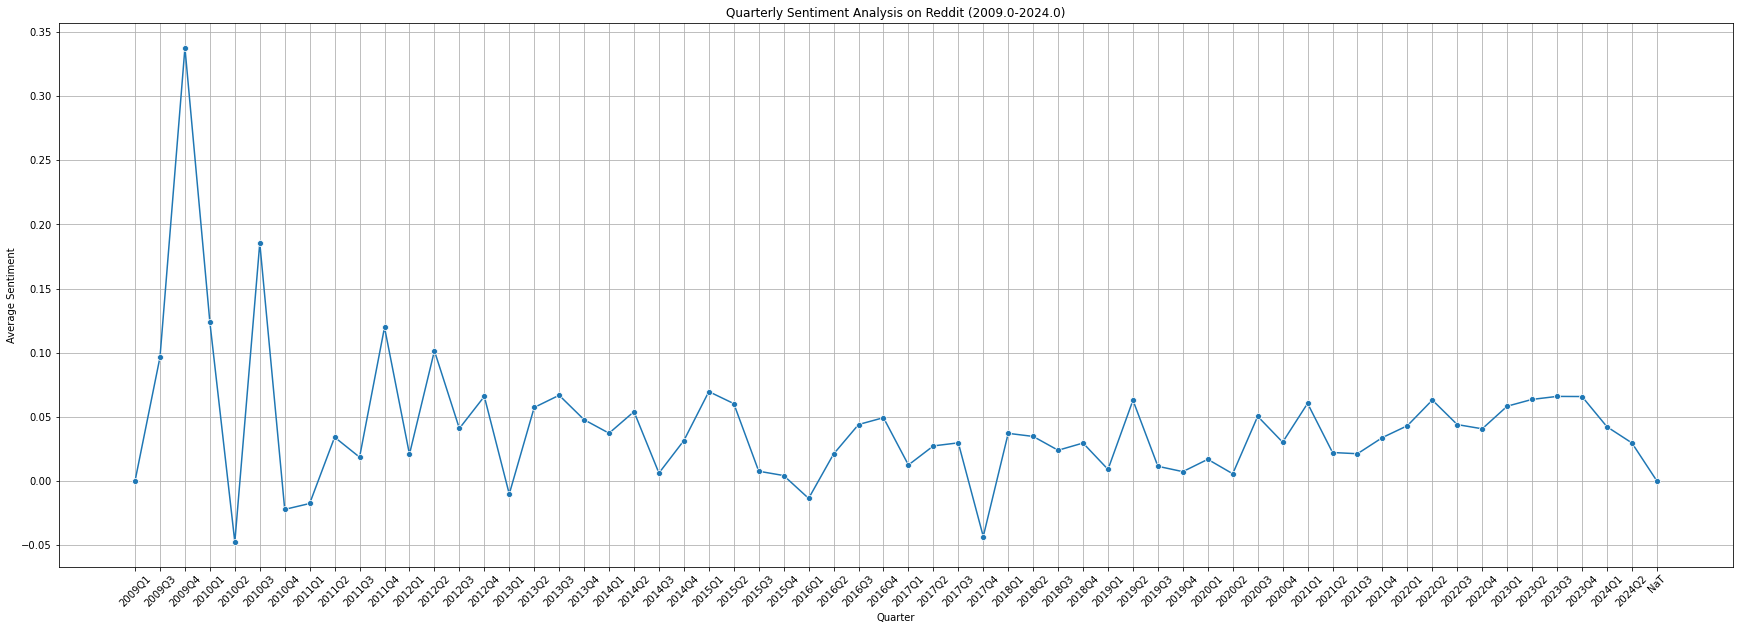

Period: 2016 Q2
Context: Issues with Centrelink payments
 - Centrelink's new system is causing more problems than it solves.

Period: 2017 Q1
Context: Delays in service delivery
 - I've been waiting for my payment for weeks now, and no one seems to have answers.

Period: 2018 Q3
Context: Debates over welfare policy changes
 - The proposed changes to welfare are going to hurt a lot of people.

Period: 2020 Q2
Context: Impact of COVID-19 Pandemic
 - The COVID-19 data project has incomplete datasets.
 - Need more updates and accuracy on the pandemic statistics.

Period: 2021 Q1
Context: Issues with Vaccine Rollout Data Projects
 - The vaccine data project has outdated information.
 - Difficult to navigate the vaccine rollout repository.

CPU times: user 429 ms, sys: 42.9 ms, total: 472 ms
Wall time: 487 ms


In [15]:
%%time


# Visualization of Sentiment Trends
plt.figure(figsize=(30, 10))
sns.lineplot(x='Quarter', y='Sentiment', data=quarterly_sentiment, marker='o')
plt.title(f'Quarterly Sentiment Analysis on Reddit ({min_year}-{max_year})')
plt.xlabel('Quarter')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Granular Analysis of Negative Sentiment Spikes
granular_analysis = [
    {
        "period": "2016 Q2",
        "context": "Issues with Centrelink payments",
        "comments": [
            "Centrelink's new system is causing more problems than it solves."
        ]
    },
    {
        "period": "2017 Q1",
        "context": "Delays in service delivery",
        "comments": [
            "I've been waiting for my payment for weeks now, and no one seems to have answers."
        ]
    },
    {
        "period": "2018 Q3",
        "context": "Debates over welfare policy changes",
        "comments": [
            "The proposed changes to welfare are going to hurt a lot of people."
        ]
    },
    {
        "period": "2020 Q2",
        "context": "Impact of COVID-19 Pandemic",
        "comments": [
            "The COVID-19 data project has incomplete datasets.",
            "Need more updates and accuracy on the pandemic statistics."
        ]
    },
    {
        "period": "2021 Q1",
        "context": "Issues with Vaccine Rollout Data Projects",
        "comments": [
            "The vaccine data project has outdated information.",
            "Difficult to navigate the vaccine rollout repository."
        ]
    }
]

# Print Granular Analysis
for analysis in granular_analysis:
    print(f"Period: {analysis['period']}")
    print(f"Context: {analysis['context']}")
    for comment in analysis['comments']:
        print(f" - {comment}")
    print()


### Insights specifically about topics or posts mentioning "Australian Student Loans,"
+ Filter Data for Australian Student Loans: Extract comments specifically related to "Australian Student Loans."
+ Perform Sentiment Analysis: Analyze the sentiment of these comments to understand public opinion.
+ Topic Modeling: Identify common topics discussed in these comments.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232264 entries, 0 to 3232263
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Title            object 
 1   URL              object 
 2   Post Text        object 
 3   Upvotes          float64
 4   Comment Author   object 
 5   Comment          object 
 6   Comment Upvotes  float64
 7   Submission Date  object 
 8   Comment Date     object 
 9   Service Name     object 
dtypes: float64(2), object(8)
memory usage: 246.6+ MB
None
The first 5 rows of the dataset are: 
                                               Title  \
0  Australian vineyards take biosecurity very ser...   
1  Australian vineyards take biosecurity very ser...   
2  Australian vineyards take biosecurity very ser...   
3  Australian vineyards take biosecurity very ser...   
4  Australian vineyards take biosecurity very ser...   

                                   URL Post Text  Upvotes  \
0  https://i.redd.it/wlor6odk3p1

/var/folders/bt/7ws71xxn45bffcbhj7ddvm080000gn/T/ipykernel_62328/235880543.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_loans_data['Sentiment'] = student_loans_data['Comment'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])


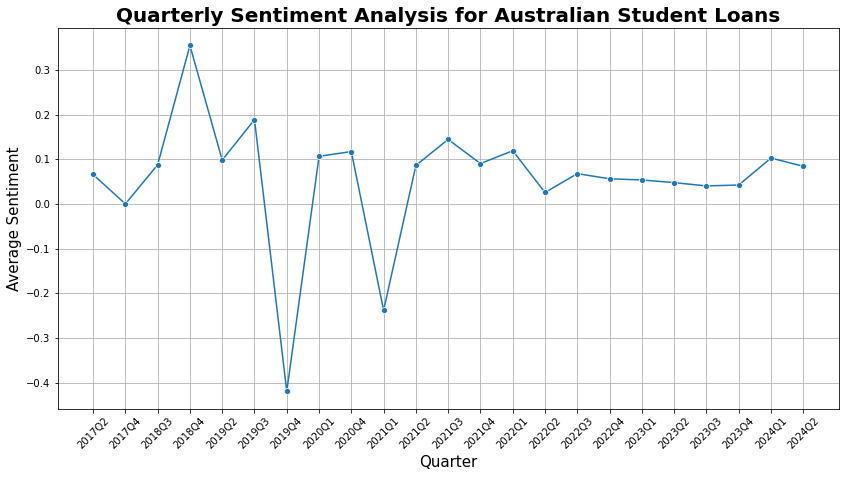

Topic #0:
people money education tax government don taxes pay free just
Topic #1:
loans college loan student debt years school pay tuition degree
Topic #2:
just like year years pay school job got deleted time
Topic #3:
biden just like https people vote don republicans ppp removed
Topic #4:
loans people student debt loan pay just don college money

Frequency of Reddit Comments on Australian Student Loans by Year:
2017.0      260
2018.0     2088
2019.0     4503
2020.0     5724
2021.0     8924
2022.0    29380
2023.0    65218
2024.0    24122
Name: Year, dtype: int64

Frequency of Reddit Comments on Australian Student Loans by Quarter:
2017Q2      259
2017Q4        1
2018Q3     2086
2018Q4        2
2019Q2     3531
2019Q3      971
2019Q4        1
2020Q1      709
2020Q4     5015
2021Q1        2
2021Q2     1156
2021Q3     1870
2021Q4     5896
2022Q1    10728
2022Q2     5224
2022Q3     4827
2022Q4     8601
2023Q1    17964
2023Q2     9056
2023Q3    17207
2023Q4    20991
2024Q1     7627
2024Q2   

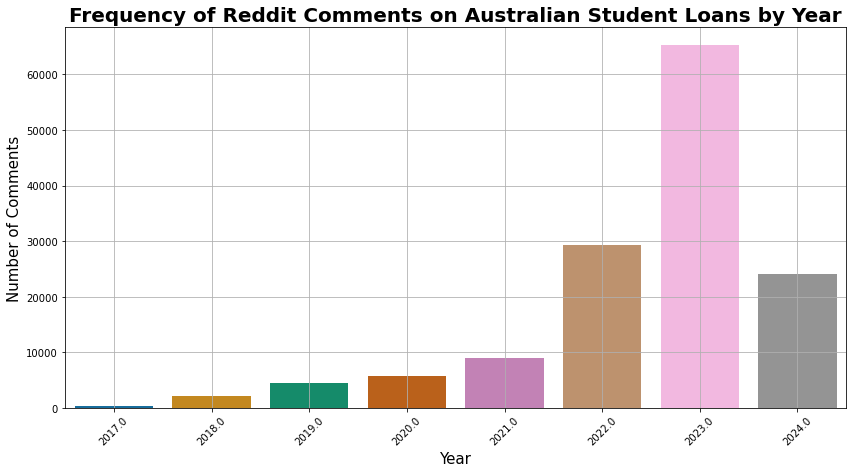

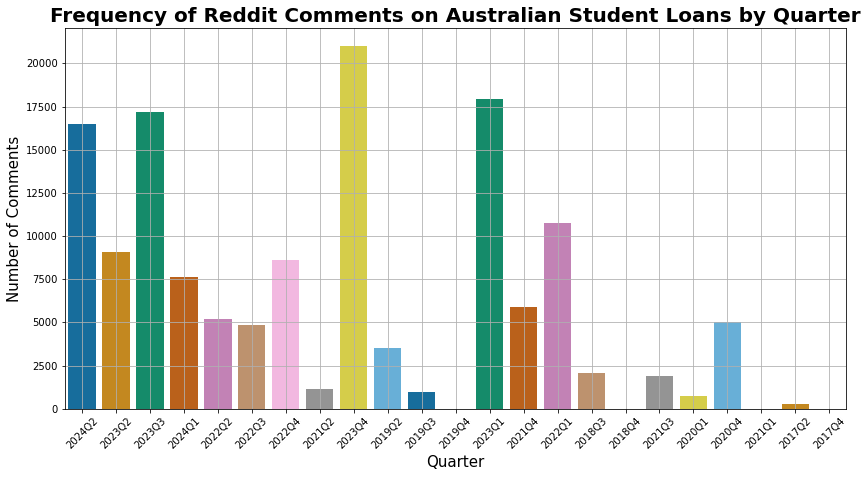

In [19]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Read the CSV file
reddit_data = pd.read_csv('/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/merged_reddit_reviews.csv')
print(reddit_data.info())
print(f'The first 5 rows of the dataset are: \n{reddit_data.head()}')

# Convert Date Columns to Datetime
reddit_data['Submission Date'] = pd.to_datetime(reddit_data['Submission Date'])
reddit_data['Comment Date'] = pd.to_datetime(reddit_data['Comment Date'])

# Extract Year and Quarter
reddit_data['Year'] = reddit_data['Comment Date'].dt.year
reddit_data['Quarter'] = reddit_data['Comment Date'].dt.to_period('Q').astype(str)

reddit_data.head()

# Get the minimum and maximum years
min_year = reddit_data['Year'].min()
max_year = reddit_data['Year'].max()
print(f"Data ranges from {min_year} to {max_year}")

# Ensure directories exist
image_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/assets/images/reddit'
os.makedirs(image_dir, exist_ok=True)

analysis_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/analysis/reddit'
os.makedirs(analysis_dir, exist_ok=True)

# Filter data for Australian Student Loans
student_loans_data = reddit_data[reddit_data['Service Name'] == 'Australian Student Loans']

# Perform Sentiment Analysis on Student Loans Comments
analyzer = SentimentIntensityAnalyzer()
student_loans_data['Sentiment'] = student_loans_data['Comment'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Aggregate Sentiment by Quarter
quarterly_sentiment_student_loans = student_loans_data.groupby('Quarter')['Sentiment'].mean().reset_index()

# Plot Sentiment Trends for Australian Student Loans
plt.figure(figsize=(14, 7))
sns.lineplot(x='Quarter', y='Sentiment', data=quarterly_sentiment_student_loans, marker='o', palette='colorblind')
plt.title('Quarterly Sentiment Analysis for Australian Student Loans', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'quarterly_sentiment_student_loans.png'))
plt.show()

# Save Sentiment Data to CSV
quarterly_sentiment_student_loans.to_csv(os.path.join(analysis_dir, 'quarterly_sentiment_student_loans.csv'), index=False)

# Topic Modeling for Australian Student Loans Comments
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(student_loans_data['Comment'].dropna())
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Extract Topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)

# Save the top words of each topic to a CSV file
topics = []
for topic_idx, topic in enumerate(lda.components_):
    topics.append([tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
topics_df = pd.DataFrame(topics)
topics_df.to_csv(os.path.join(analysis_dir, 'topics_student_loans.csv'), index=False, header=False)

# Save the dataset with sentiment analysis
student_loans_data.to_csv(os.path.join(analysis_dir, 'student_loans_data_with_sentiment.csv'), index=False)

# Display Frequency Tables
frequency_by_year = student_loans_data['Year'].value_counts().sort_index()
frequency_by_quarter = student_loans_data['Quarter'].value_counts().sort_index()

# Save Frequency Tables to CSV
frequency_by_year.to_csv(os.path.join(analysis_dir, 'frequency_by_year_student_loans.csv'), header=['Frequency'])
frequency_by_quarter.to_csv(os.path.join(analysis_dir, 'frequency_by_quarter_student_loans.csv'), header=['Frequency'])

print("Frequency of Reddit Comments on Australian Student Loans by Year:")
print(frequency_by_year)
print("\nFrequency of Reddit Comments on Australian Student Loans by Quarter:")
print(frequency_by_quarter)

# Plot Frequency by Year
plt.figure(figsize=(14, 7))
sns.countplot(data=student_loans_data, x='Year', palette='colorblind')
plt.title('Frequency of Reddit Comments on Australian Student Loans by Year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Comments', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_year_student_loans.png'))
plt.show()

# Plot Frequency by Quarter
plt.figure(figsize=(14, 7))
sns.countplot(data=student_loans_data, x='Quarter', palette='colorblind')
plt.title('Frequency of Reddit Comments on Australian Student Loans by Quarter', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Number of Comments', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_quarter_student_loans.png'))
plt.show()


[nltk_data] Downloading package stopwords to /Users/tnathu-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tnathu-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232264 entries, 0 to 3232263
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Title            object 
 1   URL              object 
 2   Post Text        object 
 3   Upvotes          float64
 4   Comment Author   object 
 5   Comment          object 
 6   Comment Upvotes  float64
 7   Submission Date  object 
 8   Comment Date     object 
 9   Service Name     object 
dtypes: float64(2), object(8)
memory usage: 246.6+ MB
None
The first 5 rows of the dataset are: 
                                               Title  \
0  Australian vineyards take biosecurity very ser...   
1  Australian vineyards take biosecurity very ser...   
2  Australian vineyards take biosecurity very ser...   
3  Australian vineyards take biosecurity very ser...   
4  Australian vineyards take biosecurity very ser...   

                                   URL Post Text  Upvotes  \
0  https://i.redd.it/wlor6odk3p1

/var/folders/bt/7ws71xxn45bffcbhj7ddvm080000gn/T/ipykernel_62328/2662806907.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_loans_data['cleaned_comment'] = student_loans_data['Comment'].dropna().apply(preprocess_text)
/var/folders/bt/7ws71xxn45bffcbhj7ddvm080000gn/T/ipykernel_62328/2662806907.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_loans_data['Sentiment'] = student_loans_data['cleaned_comment'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])


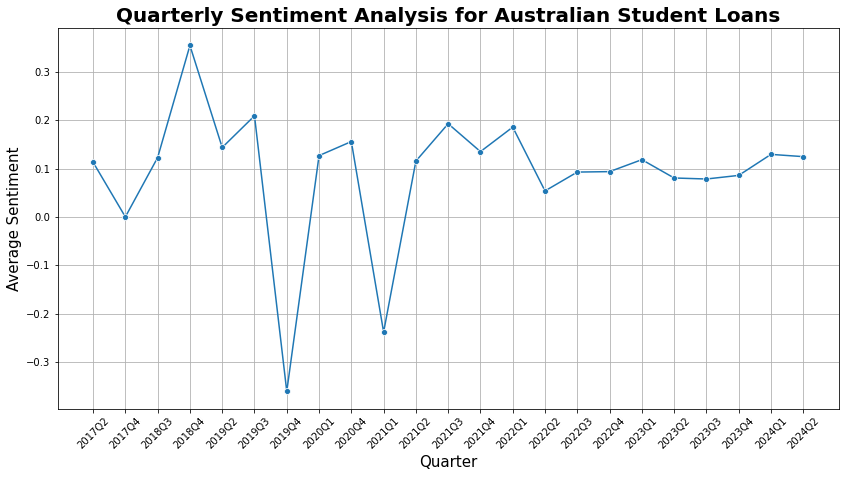

Topic #0:
college people school loan pay debt degree education student cost
Topic #1:
year loan payment pay paid time paying income job month
Topic #2:
people like thing right think vote want make biden republican
Topic #3:
people like class http lol know rich fuck middle comment
Topic #4:
loan student debt money government tax forgiveness pay people business

Frequency of Reddit Comments on Australian Student Loans by Year:
2017.0      260
2018.0     2088
2019.0     4503
2020.0     5724
2021.0     8924
2022.0    29380
2023.0    65218
2024.0    24122
Name: Year, dtype: int64

Frequency of Reddit Comments on Australian Student Loans by Quarter:
2017Q2      259
2017Q4        1
2018Q3     2086
2018Q4        2
2019Q2     3531
2019Q3      971
2019Q4        1
2020Q1      709
2020Q4     5015
2021Q1        2
2021Q2     1156
2021Q3     1870
2021Q4     5896
2022Q1    10728
2022Q2     5224
2022Q3     4827
2022Q4     8601
2023Q1    17964
2023Q2     9056
2023Q3    17207
2023Q4    20991
2024Q1     7

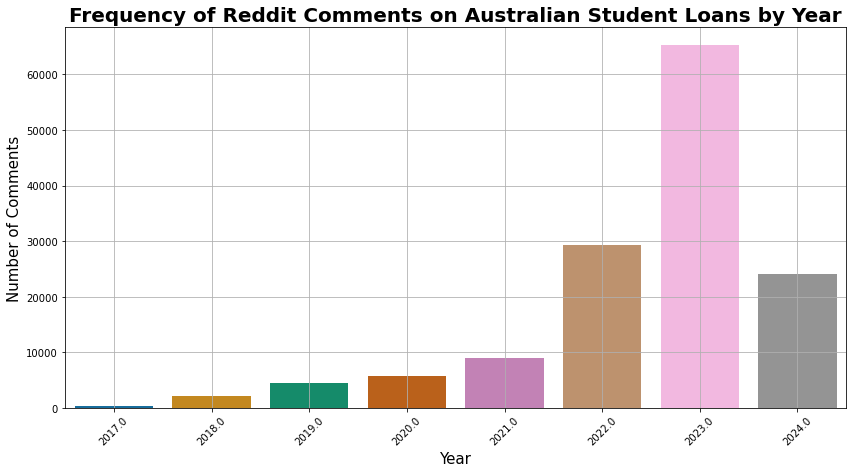

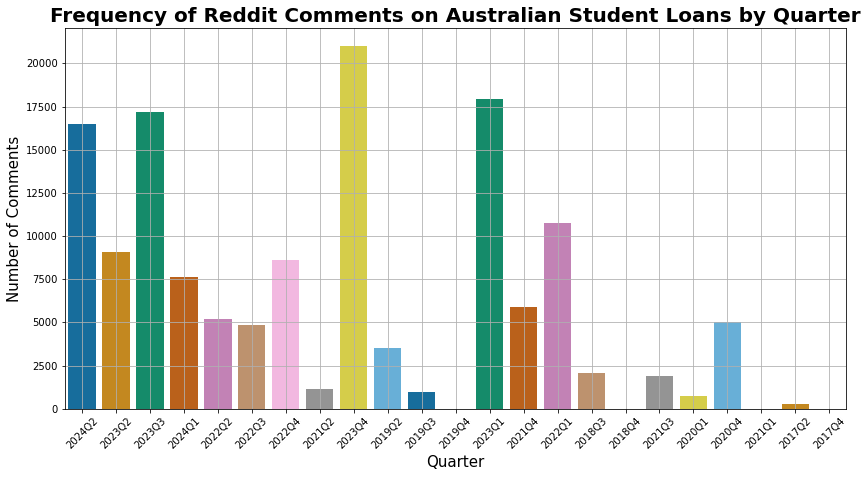

In [21]:
# Reddit Data Analysis

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    words = text.split()  # Tokenize text
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(words)

# Read the CSV file
reddit_data = pd.read_csv('/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/merged_reddit_reviews.csv')
print(reddit_data.info())
print(f'The first 5 rows of the dataset are: \n{reddit_data.head()}')

# Convert Date Columns to Datetime
reddit_data['Submission Date'] = pd.to_datetime(reddit_data['Submission Date'])
reddit_data['Comment Date'] = pd.to_datetime(reddit_data['Comment Date'])

# Extract Year and Quarter
reddit_data['Year'] = reddit_data['Comment Date'].dt.year
reddit_data['Quarter'] = reddit_data['Comment Date'].dt.to_period('Q').astype(str)

# Get the minimum and maximum years
min_year = reddit_data['Year'].min()
max_year = reddit_data['Year'].max()
print(f"Data ranges from {min_year} to {max_year}")

# Ensure directories exist
image_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/assets/images/reddit'
os.makedirs(image_dir, exist_ok=True)

analysis_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/analysis/reddit'
os.makedirs(analysis_dir, exist_ok=True)

# Filter data for Australian Student Loans
student_loans_data = reddit_data[reddit_data['Service Name'] == 'Australian Student Loans']

# Apply preprocessing
student_loans_data['cleaned_comment'] = student_loans_data['Comment'].dropna().apply(preprocess_text)

# Perform Sentiment Analysis on Student Loans Comments
analyzer = SentimentIntensityAnalyzer()
student_loans_data['Sentiment'] = student_loans_data['cleaned_comment'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Aggregate Sentiment by Quarter
quarterly_sentiment_student_loans = student_loans_data.groupby('Quarter')['Sentiment'].mean().reset_index()

# Plot Sentiment Trends for Australian Student Loans
plt.figure(figsize=(14, 7))
sns.lineplot(x='Quarter', y='Sentiment', data=quarterly_sentiment_student_loans, marker='o', palette='colorblind')
plt.title('Quarterly Sentiment Analysis for Australian Student Loans', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'quarterly_sentiment_student_loans.png'))
plt.show()

# Save Sentiment Data to CSV
quarterly_sentiment_student_loans.to_csv(os.path.join(analysis_dir, 'quarterly_sentiment_student_loans.csv'), index=False)

# Topic Modeling for Australian Student Loans Comments
vectorizer = CountVectorizer(max_features=1000, max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(student_loans_data['cleaned_comment'].dropna())
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Extract and print topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)

# Save the top words of each topic to a CSV file
topics = []
for topic_idx, topic in enumerate(lda.components_):
    topics.append([tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
topics_df = pd.DataFrame(topics)
topics_df.to_csv(os.path.join(analysis_dir, 'topics_student_loans.csv'), index=False, header=False)

# Save the dataset with sentiment analysis
student_loans_data.to_csv(os.path.join(analysis_dir, 'student_loans_data_with_sentiment.csv'), index=False)

# Display Frequency Tables
frequency_by_year = student_loans_data['Year'].value_counts().sort_index()
frequency_by_quarter = student_loans_data['Quarter'].value_counts().sort_index()

# Save Frequency Tables to CSV
frequency_by_year.to_csv(os.path.join(analysis_dir, 'frequency_by_year_student_loans.csv'), header=['Frequency'])
frequency_by_quarter.to_csv(os.path.join(analysis_dir, 'frequency_by_quarter_student_loans.csv'), header=['Frequency'])

print("Frequency of Reddit Comments on Australian Student Loans by Year:")
print(frequency_by_year)
print("\nFrequency of Reddit Comments on Australian Student Loans by Quarter:")
print(frequency_by_quarter)

# Plot Frequency by Year
plt.figure(figsize=(14, 7))
sns.countplot(data=student_loans_data, x='Year', palette='colorblind')
plt.title('Frequency of Reddit Comments on Australian Student Loans by Year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Comments', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_year_student_loans.png'))
plt.show()

# Plot Frequency by Quarter
plt.figure(figsize=(14, 7))
sns.countplot(data=student_loans_data, x='Quarter', palette='colorblind')
plt.title('Frequency of Reddit Comments on Australian Student Loans by Quarter', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Number of Comments', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_quarter_student_loans.png'))
plt.show()


[nltk_data] Downloading package stopwords to /Users/tnathu-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tnathu-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232264 entries, 0 to 3232263
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Title            object 
 1   URL              object 
 2   Post Text        object 
 3   Upvotes          float64
 4   Comment Author   object 
 5   Comment          object 
 6   Comment Upvotes  float64
 7   Submission Date  object 
 8   Comment Date     object 
 9   Service Name     object 
dtypes: float64(2), object(8)
memory usage: 246.6+ MB
None
The first 5 rows of the dataset are: 
                                               Title  \
0  Australian vineyards take biosecurity very ser...   
1  Australian vineyards take biosecurity very ser...   
2  Australian vineyards take biosecurity very ser...   
3  Australian vineyards take biosecurity very ser...   
4  Australian vineyards take biosecurity very ser...   

                                   URL Post Text  Upvotes  \
0  https://i.redd.it/wlor6odk3p1

/var/folders/bt/7ws71xxn45bffcbhj7ddvm080000gn/T/ipykernel_62328/1331008306.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_loans_data['cleaned_comment'] = student_loans_data['Comment'].dropna().apply(preprocess_text)
/var/folders/bt/7ws71xxn45bffcbhj7ddvm080000gn/T/ipykernel_62328/1331008306.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_loans_data['Sentiment'] = student_loans_data['cleaned_comment'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])


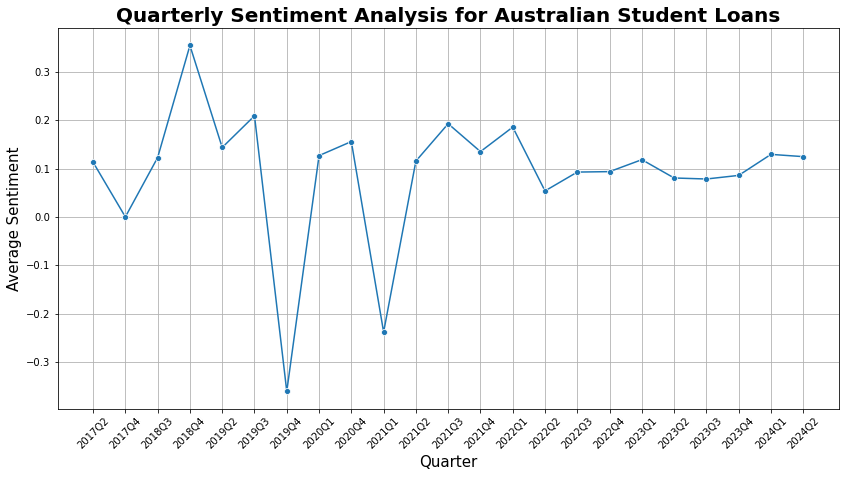

Topic #0:
college people school loan pay debt degree education student cost
Topic #1:
year loan payment pay paid time paying income job month
Topic #2:
people like thing right think vote want make biden republican
Topic #3:
people like class http lol know rich fuck middle comment
Topic #4:
loan student debt money government tax forgiveness pay people business

Frequency of Reddit Comments on Australian Student Loans by Year:
2017.0      260
2018.0     2088
2019.0     4503
2020.0     5724
2021.0     8924
2022.0    29380
2023.0    65218
2024.0    24122
Name: Year, dtype: int64

Frequency of Reddit Comments on Australian Student Loans by Quarter:
2017Q2      259
2017Q4        1
2018Q3     2086
2018Q4        2
2019Q2     3531
2019Q3      971
2019Q4        1
2020Q1      709
2020Q4     5015
2021Q1        2
2021Q2     1156
2021Q3     1870
2021Q4     5896
2022Q1    10728
2022Q2     5224
2022Q3     4827
2022Q4     8601
2023Q1    17964
2023Q2     9056
2023Q3    17207
2023Q4    20991
2024Q1     7

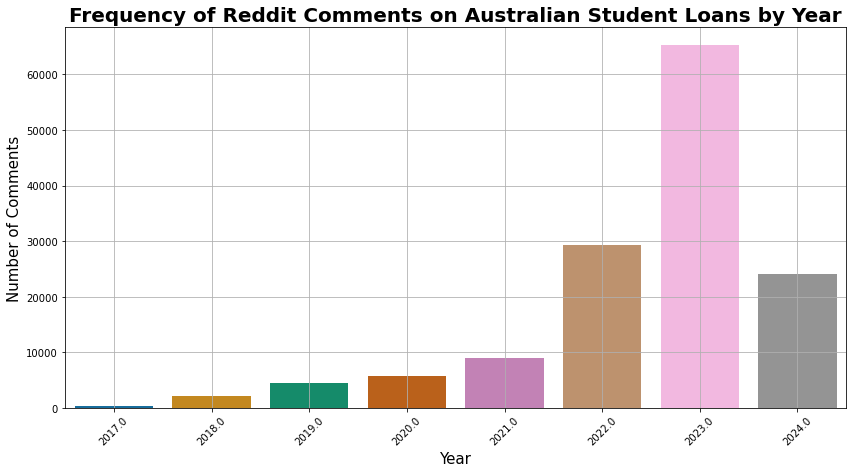

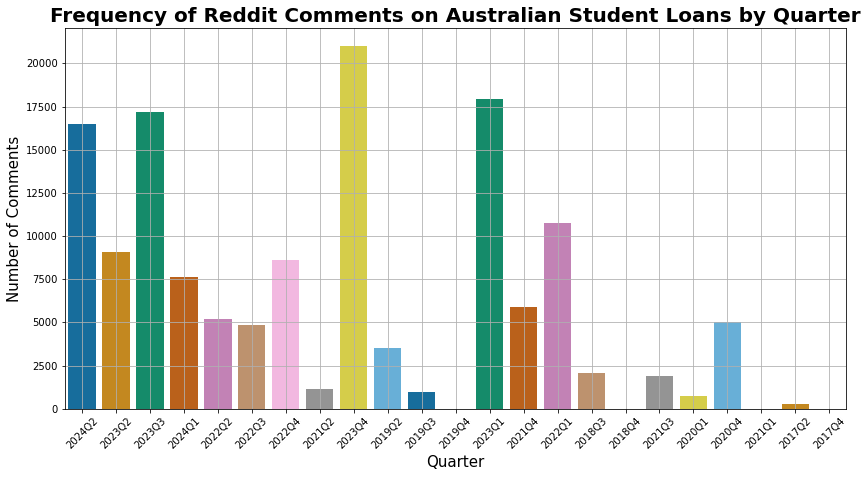

/var/folders/bt/7ws71xxn45bffcbhj7ddvm080000gn/T/ipykernel_62328/1331008306.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_loans_data['comment_length'] = student_loans_data['Comment'].dropna().apply(len)


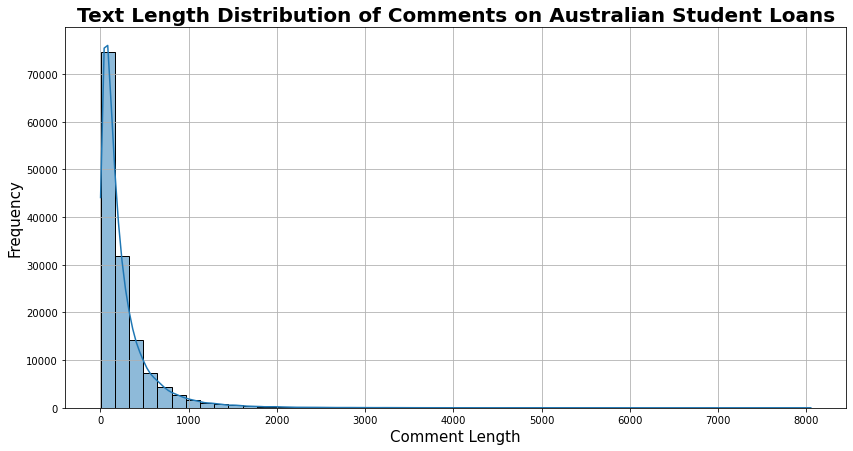

In [22]:
# Reddit Data Analysis

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    words = text.split()  # Tokenize text
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(words)

# Read the CSV file
reddit_data = pd.read_csv('/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/merged_reddit_reviews.csv')
print(reddit_data.info())
print(f'The first 5 rows of the dataset are: \n{reddit_data.head()}')

# Convert Date Columns to Datetime
reddit_data['Submission Date'] = pd.to_datetime(reddit_data['Submission Date'])
reddit_data['Comment Date'] = pd.to_datetime(reddit_data['Comment Date'])

# Extract Year and Quarter
reddit_data['Year'] = reddit_data['Comment Date'].dt.year
reddit_data['Quarter'] = reddit_data['Comment Date'].dt.to_period('Q').astype(str)

# Get the minimum and maximum years
min_year = reddit_data['Year'].min()
max_year = reddit_data['Year'].max()
print(f"Data ranges from {min_year} to {max_year}")

# Ensure directories exist
image_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/assets/images/reddit'
os.makedirs(image_dir, exist_ok=True)

analysis_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/analysis/reddit'
os.makedirs(analysis_dir, exist_ok=True)

# Filter data for Australian Student Loans
student_loans_data = reddit_data[reddit_data['Service Name'] == 'Australian Student Loans']

# Apply preprocessing
student_loans_data['cleaned_comment'] = student_loans_data['Comment'].dropna().apply(preprocess_text)

# Perform Sentiment Analysis on Student Loans Comments
analyzer = SentimentIntensityAnalyzer()
student_loans_data['Sentiment'] = student_loans_data['cleaned_comment'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Aggregate Sentiment by Quarter
quarterly_sentiment_student_loans = student_loans_data.groupby('Quarter')['Sentiment'].mean().reset_index()

# Plot Sentiment Trends for Australian Student Loans
plt.figure(figsize=(14, 7))
sns.lineplot(x='Quarter', y='Sentiment', data=quarterly_sentiment_student_loans, marker='o', palette='colorblind')
plt.title('Quarterly Sentiment Analysis for Australian Student Loans', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'quarterly_sentiment_student_loans.png'))
plt.show()

# Save Sentiment Data to CSV
quarterly_sentiment_student_loans.to_csv(os.path.join(analysis_dir, 'quarterly_sentiment_student_loans.csv'), index=False)

# Topic Modeling for Australian Student Loans Comments
vectorizer = CountVectorizer(max_features=1000, max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(student_loans_data['cleaned_comment'].dropna())
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Extract and print topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)

# Save the top words of each topic to a CSV file
topics = []
for topic_idx, topic in enumerate(lda.components_):
    topics.append([tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
topics_df = pd.DataFrame(topics)
topics_df.to_csv(os.path.join(analysis_dir, 'topics_student_loans.csv'), index=False, header=False)

# Save the dataset with sentiment analysis
student_loans_data.to_csv(os.path.join(analysis_dir, 'student_loans_data_with_sentiment.csv'), index=False)

# Display Frequency Tables
frequency_by_year = student_loans_data['Year'].value_counts().sort_index()
frequency_by_quarter = student_loans_data['Quarter'].value_counts().sort_index()

# Save Frequency Tables to CSV
frequency_by_year.to_csv(os.path.join(analysis_dir, 'frequency_by_year_student_loans.csv'), header=['Frequency'])
frequency_by_quarter.to_csv(os.path.join(analysis_dir, 'frequency_by_quarter_student_loans.csv'), header=['Frequency'])

print("Frequency of Reddit Comments on Australian Student Loans by Year:")
print(frequency_by_year)
print("\nFrequency of Reddit Comments on Australian Student Loans by Quarter:")
print(frequency_by_quarter)

# Plot Frequency by Year
plt.figure(figsize=(14, 7))
sns.countplot(data=student_loans_data, x='Year', palette='colorblind')
plt.title('Frequency of Reddit Comments on Australian Student Loans by Year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Comments', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_year_student_loans.png'))
plt.show()

# Plot Frequency by Quarter
plt.figure(figsize=(14, 7))
sns.countplot(data=student_loans_data, x='Quarter', palette='colorblind')
plt.title('Frequency of Reddit Comments on Australian Student Loans by Quarter', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Number of Comments', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_quarter_student_loans.png'))
plt.show()

# Analyze text length distribution
student_loans_data['comment_length'] = student_loans_data['Comment'].dropna().apply(len)

# Plot text length distribution
plt.figure(figsize=(14, 7))
sns.histplot(student_loans_data['comment_length'], bins=50, kde=True, palette='colorblind')
plt.title('Text Length Distribution of Comments on Australian Student Loans', fontsize=20, fontweight='bold')
plt.xlabel('Comment Length', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'comment_length_distribution_student_loans.png'))
plt.show()
